Создание нейронной сети, распознающей рукописные цифры

# Шаг 1. Загрузка данных

## Используйте набор данных для задачи классификации (например, набор данных MNIST для распознавания рукописных цифр).



Ссылка на базу https://learn.microsoft.com/ru-ru/azure/open-datasets/dataset-mnist?tabs=azureml-opendatasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

## Загрузите данные и разделите их на тренировочный и тестовый наборы.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


**(x_train, y_train), (x_test, y_test)**: Результат, возвращаемый mnist.load_data(), состоит из двух пар кортежей. Первая пара (x_train, y_train) представляет обучающую выборку, а вторая пара (x_test, y_test) - тестовую выборку.

**x_train и x_test**: Это изображения цифр, представленные в виде массивов NumPy. Каждое изображение представляет собой матрицу пикселей, где значения элементов указывают яркость соответствующего пикселя.

**y_train и y_test**: Это метки (целевые значения) для соответствующих изображений. Они представляют собой цифры от 0 до 9, указывающие на класс объекта (цифры от 0 до 9), изображенного на соответствующем изображении.

Далее необходимо выполнить нормализацию входных значений.

**Нормализация входных данных** - это процесс приведения значений входных данных к определенному диапазону или распределению. В контексте машинного обучения, особенно для нейронных сетей, нормализация часто проводится для стандартизации значений и улучшения процесса обучения.


После загрузки данных MNIST, нормализация будет выполняться путем деления значений пикселей на 255.0 (максимальное значение яркости пикселя), чтобы значения оказались в диапазоне от 0 до 1. Это типичная практика для изображений.

In [6]:
# нормализуем входные значения, в нашем случае градация серого от 0 до 255
# для каждого пикселя из вектора в 784 пикселя
# чтобы они представляли собой последовательность от 0 до 1
x_train = x_train /  225
x_test = x_test / 225

Также необходимо подготовить правильный формат выходных значений.

В y_train[] содержится изображение, например 5, но на выходе оно должно быть представлено в виде вектора из 10 цифр [0,0,0,0,0,1,0,0,0,0], что мы и получаем с помощью метода keras.utils.to_categorical(y_train, 10), 

то есть 
y_train_cat = keras.utils.to_categorical(y_train, 10)

In [12]:
# преобразуем входные значения в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

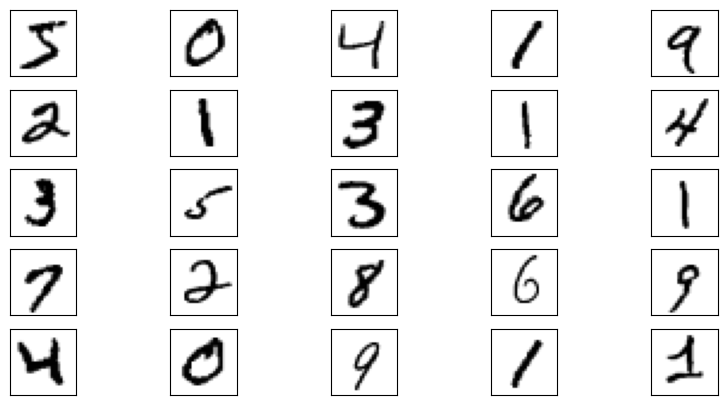

In [10]:
# выведем первые 25 изображений цифр
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

# Шаг 2. Создание нейросети
## Импортируйте библиотеки TensorFlow и Keras.



Импортированы в начале документа

## Создайте простую нейросеть с несколькими слоями. Например, это может быть сеть с одним входным слоем, одним скрытым слоем и выходным слоем.



Рассмотрим архитектуру полносвязной рейронной сети:

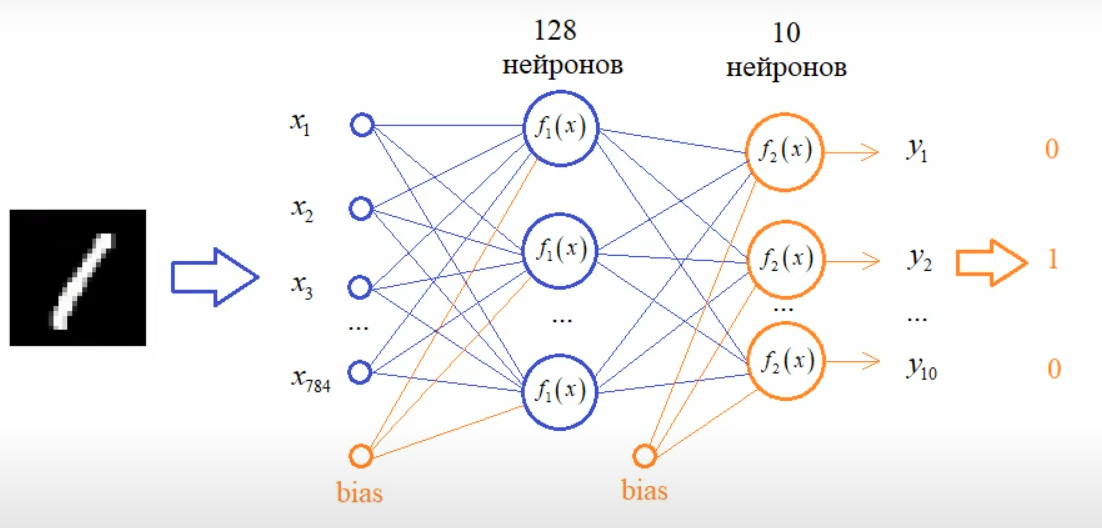

1. х₁-х₇₈₄ - на первом слое 784 входа, так как мы имеем квадратное изображение 28х28 пикселей (28*28=784) + bias - смещение

2. f₁(x) - внутренний слой со 128 нейронами

3. f₂(x) -> y1-y10 - выходной слой с 10 нейронами, так как у нас 10 цифр от 0 до 9

4. У скрытого слоя будет активационная функция Relu

5. У выходного - softmax, так как мы хотим интерпретировать выходные значения в терминах вероятности

Как работает данная нейросеть:

1. Изображение цифры (28х28 пикселей) представляется в виде вектора, состоящего из 784 элементов. В библиотеке keras можно создать слой специального вида Flatten(input_shape=(28,28,1))

Число 1 - это количество каналов (или глубина) изображения. В данном случае, 1 указывает на то, что есть один канал, что типично для черно-белых изображений.
Если были бы цветные изображения в формате RGB, то число каналов было бы равно 3 (по одному каналу для каждого цвета: красного, зеленого и синего).

2. Нужно связать каждый нейрон из 784 входного слоя с 128 нейронами скрытого слоя - для этого нужно воспользоваться классом Dense(128, activation='relu')

3. То же самое для выходного слоя - связываем 128 нейронов скрытого слоя с 10-ю нейронами выходного с помощью класса Dense(128, activation='softmax')

In [11]:
# объявим переменную, в которую запишем архитектуру модели 
# с помощью класса keras.Sequential, который позволяет 
# последовательно объявить слои нейронной сети

model = keras.Sequential([
    Flatten(input_shape=(28,28,1)), # входной слой
    Dense(128, activation='relu'), # скрытый слой
    Dense(10, activation='softmax') # выходной слой
])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**model.summary()** выводит сводку (summary) структуры нейронной сети, предоставляя информацию о количестве параметров в каждом слое, а также общее количество параметров в модели. Это полезно для быстрого анализа размерности и сложности модели перед началом обучения.

Видим, что скрытый слой имеет 100480 настраиваемых параметров, то есть, имея 784 входа и один переход (bias), умножаем это на скрытых нейронов  -> (784 + 1) * 128 = 100480 - число связей (число весовых коэффициентов), которые будут настраиваться в процессе обучения.

То же самое для выходного слоя -> (128 + 1) * 10 = 1290 весовых коэффициентов.

# Шаг 3. Обучение нейросети

## Настройте параметры обучения, такие как оптимизатор, функция потерь и метрики.



Этот шаг компиляции необходим перед началом обучения модели. Когда модель скомпилирована, она готова к обучению на тренировочных данных. В процессе обучения оптимизатор использует выбранную функцию потерь для коррекции весов модели так, чтобы минимизировать ошибку предсказания. Метрики, такие как точность, служат для оценки производительности модели на основе дополнительных показателей в процессе обучения.

In [13]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## Обучите нейросеть на тренировочных данных с использованием метода fit().



In [14]:
model.fit(x_train, # входные значения
          y_train_cat, # выходные значения
          batch_size=32, # после каждого 32 изобр корректируем весовые коэфф.
          epochs=5, #
          validation_split=0.2) # разбиваем на обучающую выборку и проверочную
                                # берем 20 % картинок из обуч. выборки
                                # и помещаем в проверочную

Epoch 1/5


1500/1500 [==============================] - 31s 16ms/step - loss: 0.2815 - accuracy: 0.9186 - val_loss: 0.1643 - val_accuracy: 0.9518
Epoch 2/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.1248 - accuracy: 0.9637 - val_loss: 0.1154 - val_accuracy: 0.9670
Epoch 3/5
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0839 - accuracy: 0.9747 - val_loss: 0.0989 - val_accuracy: 0.9723
Epoch 4/5
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.1199 - val_accuracy: 0.9645
Epoch 5/5
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.1019 - val_accuracy: 0.9718


# Шаг 4. Оценка производительности модели

## Оцените производительность обученной модели на тестовых данных, используя метод evaluate().

In [15]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 3s 7ms/step - loss: 0.0886 - accuracy: 0.9736


[0.08856206387281418, 0.9735999703407288]

Видим, что критерий качества loss= 0,0886, а метрика accuracy, то есть % распознанных цифр = 97 %.

Проверим распознавание цифр на конкретном примере:

1/1 [==============================] - 1s 760ms/step
[[1.4275369e-07 4.6985246e-08 1.2830997e-04 1.1022081e-04 1.6817165e-12
  4.2833790e-08 8.0458539e-12 9.9975961e-01 5.3631840e-07 1.0797942e-06]]
Распознанная цифра: 7


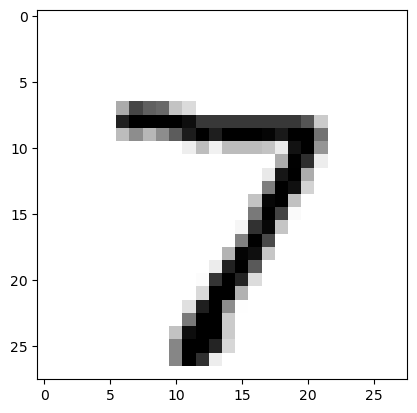

In [16]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)

print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)

plt.show()